In [1]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf

path = os.path.realpath(os.path.join(os.getcwd(),'../'))
sys.path.insert(0, path)
import astro_ts_datasets
import medical_ts_datasets

In [2]:
tf.compat.v1.enable_eager_execution()

In [93]:
as_supervised = True
split = 'train'
#split = 'train[:50%]+test[:50%]'

In [94]:
drop_fraction = 0.5

In [95]:
def augment(*data):
    if as_supervised:
        inputs, label = data
        static, times, values, measurements, lengths = inputs[0:5]
        condition = tf.random.uniform(tf.shape(measurements)) < \
                    tf.ones(tf.shape(measurements), dtype=tf.float32) * tf.random.uniform(shape=(1,), minval=0, maxval=drop_fraction)
        measurements = tf.where(
            condition,
            tf.cast(tf.zeros(tf.shape(measurements)), dtype=tf.bool),
            measurements
        )
        return (static, times, values, measurements) + inputs[4:], label
    else:
        return data

In [96]:
def preprocess(*data):
    if as_supervised:
        inputs, label = data
        static, times, values, measurements, lengths = inputs[0:5]
        times = times - times[0]
        return (static, times, values, measurements) + inputs[4:], label
    else:
        return data

In [97]:
ds, info = tfds.load(name='plasticc', split=split, with_info=True, as_supervised=as_supervised)
ds = ds.map(augment)
ds = ds.map(preprocess)

In [112]:
info

tfds.core.DatasetInfo(
    name='plasticc',
    version=1.0.10,
    description='',
    homepage='https://zenodo.org/record/2539456#.XzsWWxNKibs',
    features=FeaturesDict({
        'metadata': FeaturesDict({
            'object_id': tf.uint32,
            'redshift': tf.float32,
        }),
        'static': Tensor(shape=(3,), dtype=tf.float32),
        'static_errors': Tensor(shape=(3,), dtype=tf.float32),
        'targets': FeaturesDict({
            'class': ClassLabel(shape=(), dtype=tf.int64, num_classes=15),
        }),
        'time': Tensor(shape=(None,), dtype=tf.float32),
        'value_errors': Tensor(shape=(None, 6), dtype=tf.float32),
        'values': Tensor(shape=(None, 6), dtype=tf.float32),
    }),
    total_num_examples=40774,
    splits={
        'test': 32926,
        'train': 7848,
    },
    supervised_keys=('combined', 'target'),
    citation="""""",
    redistribution_info=,
)

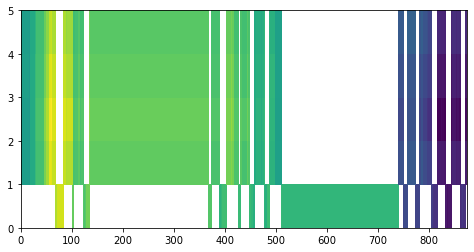

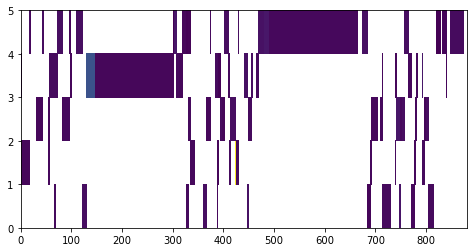

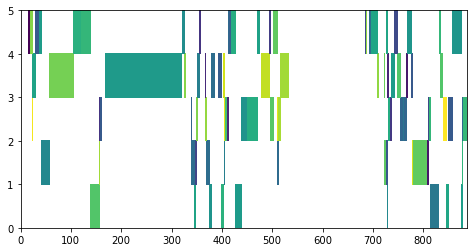

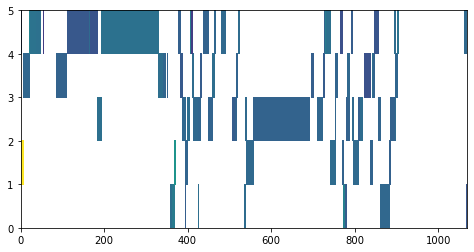

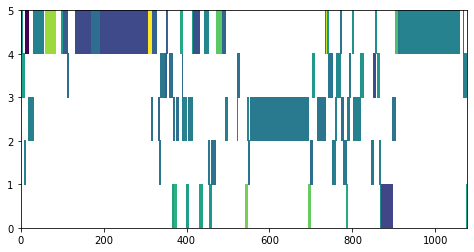

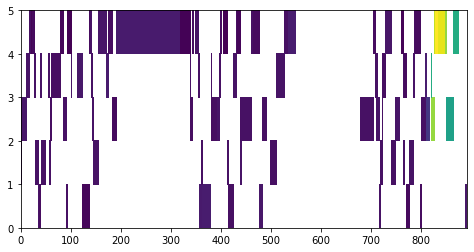

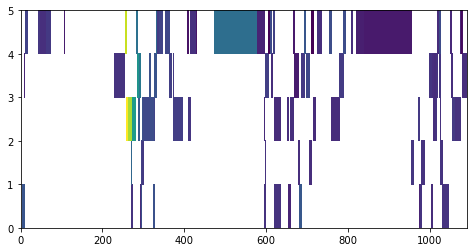

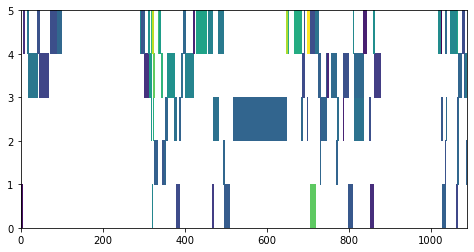

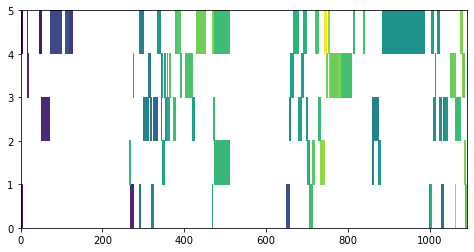

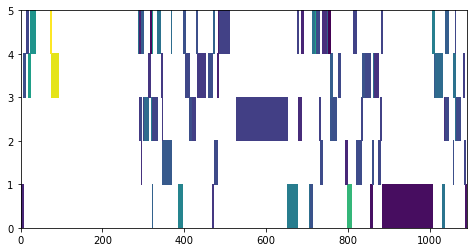

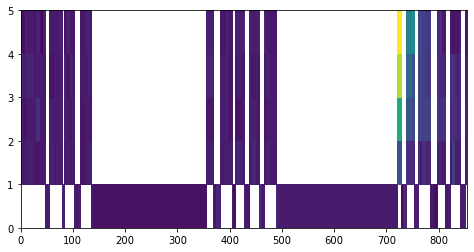

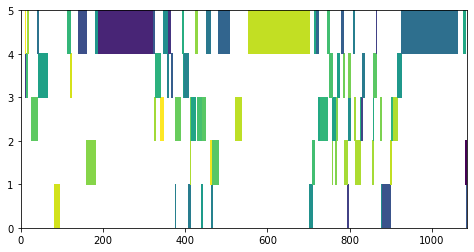

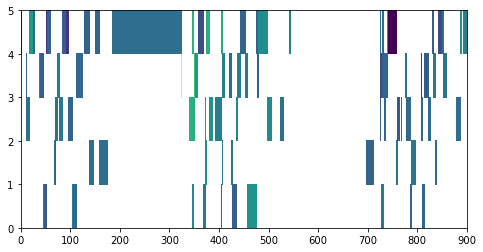

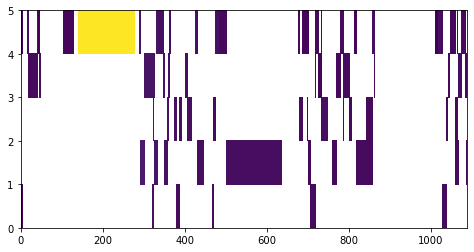

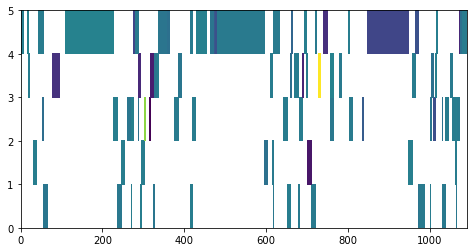

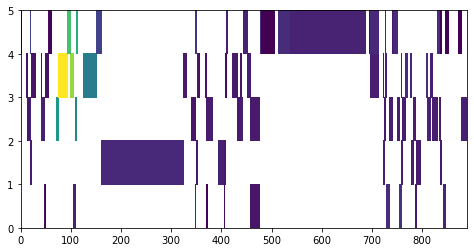

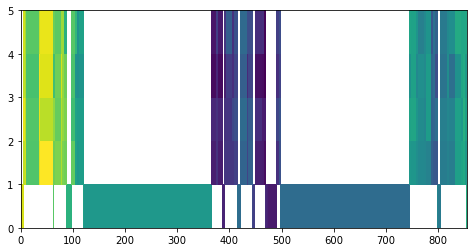

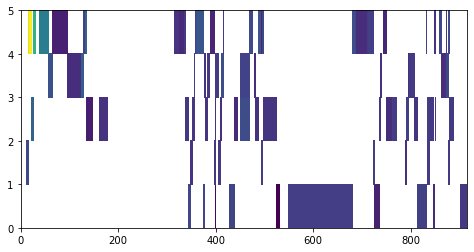

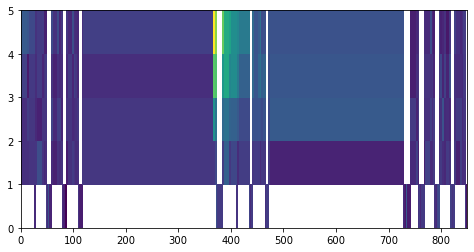

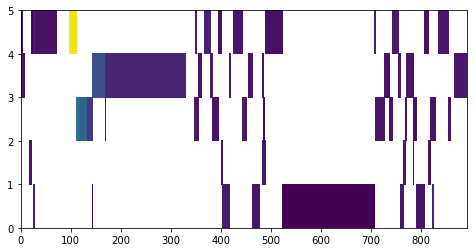

In [119]:
for d in ds.take(20):
    inputs, label = d
    static, times, values, measurements, lengths, static_errors, value_errors = inputs
    plt.figure(figsize=(8,4))
    plt.pcolormesh(times, np.arange(6), values.numpy().T)
    plt.show()